In [12]:
import os
import json
import time
import math
import matplotlib.pyplot as plt

import pandas as pd

import talib
# import numpy as np

/Users/kevin_gwdong/djangoproject/tensorflow/tensorenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


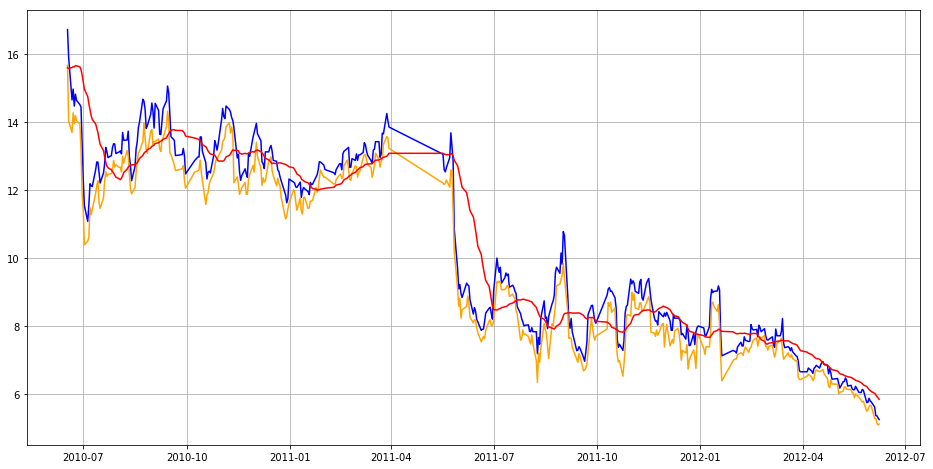

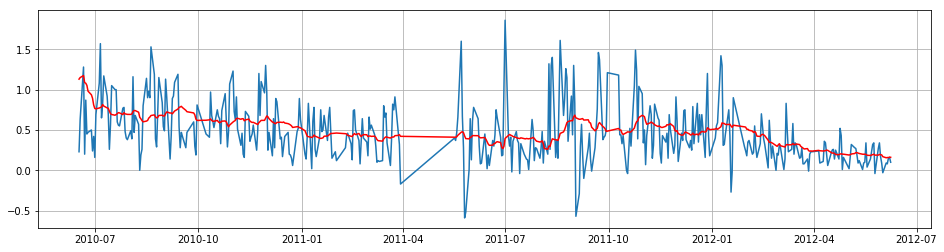

In [13]:
startDate = "2010-06-13"
endDate = "2012-06-10"
stock = "600273"
column = "High"


realdata = pd.read_csv('data/' + stock + '.CSV')
realdata['ema25'] = talib.SMA(realdata['Close'], timeperiod=25)
realdata['ema25high'] = talib.SMA(realdata['High'], timeperiod=25)
realdata['ema25low'] = talib.SMA(realdata['Low'], timeperiod=25)

# startPoint = convert_datetime_to_checkpoint(realdata, startDate)
# endPoint = convert_datetime_to_checkpoint(realdata, endDate)


datashift = realdata.shift(-1)
# print(data)
# print(datashift)

realdata['difference_shift'] = datashift.High - realdata.Low

# realdata['difference'] = realdata.High - realdata.Low



# print(difference)
highlowemadifferenct = (datashift.ema25high-datashift.ema25low)*10
realdata['hldifference_shift'] = talib.SMA(realdata['difference_shift'], timeperiod=25)
# realdata['hldifference'] = talib.SMA(realdata['difference'], timeperiod=25)

realdata['ema25difference'] = talib.SMA(highlowemadifferenct, timeperiod=25)

data = realdata.loc[(realdata['Date'] > startDate) & (realdata['Date'] < endDate)]


data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

#plot
fig = plt.figure(figsize=(16,8))
plt.grid()
plt.plot(data['High'], label='Close Price history',color="blue")
plt.plot(data['Low'], label='Close Price history',color="orange")
# plt.plot(data['Close'], label='Close Price history')
plt.plot(data['ema25'], color="red")

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(data['difference_shift'], label='Close Price history')
plt.plot(data['hldifference_shift'], color="red")
# plt.plot(data['difference'])
# plt.plot(data['hldifference'])



# plt.plot(difference+10, label='Close Price history')
# plt.plot(difference+10, label='Close Price history')

# plt.plot(datashift['ema25high'], color="green")
# plt.plot(datashift['ema25low'], color="red")

# plt.plot(highlowemadifferenct, color="red")
# plt.plot(realdata['ema25difference'], color="green")

In [5]:
import os
import glob
import pandas as pd 
import chardet
import shutil

path = '/Users/kevin_gwdong/windowsshare/daydata/' 
path_to_save = 'data/'

stock = "600460"


# all_files = glob.glob(path + stock + ".csv")

filename = glob.glob(path + stock + ".csv")[0]

with open(filename, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df = pd.read_csv(filename, encoding=result['encoding'])

df.drop(df.tail(1).index,inplace=True)

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Amount']

df.to_csv(os.path.join(path_to_save, stock + ".csv"), index=False)
    
    
#     else : 
#         print(filename)

In [1]:
import tushare as ts
ts.get_industry_classified().to_csv("industry_classified.csv")
ts.get_concept_classified().to_csv("concept_classified.csv")
# print(ts.get_industry_classified())
# # stocks.industry.unique()
# print(ts.get_concept_classified())



In [2]:
import tushare as ts
ts.get_today_all().to_csv("all_stocks.csv")
print()
print("finish")


finish


In [12]:
import pandas as pd 
from pymongo import MongoClient
import tushare as ts
from apps.dailyrun import bhs_rule, data_prepare,bhs_rule_pure



# stock = "002635"
all_stocks_today = pd.read_csv("all_stocks.csv")
all_stocks_yesterday = pd.read_csv("all_stocks.csv")
industry_classified =  pd.read_csv("industry_classified.csv")
concept_classified =  pd.read_csv("concept_classified.csv")


def check_ud_status(all_stocks_yesterday, all_stocks_today):
    selected_sh = all_stocks_yesterday.loc[all_stocks_yesterday['code']<300000]
    selected_sz = all_stocks_yesterday.loc[all_stocks_yesterday['code']>400000]
    chuangyeban = all_stocks_yesterday.loc[(all_stocks_yesterday['code']<400000) & (all_stocks_yesterday['code']>300000)]
    selected = selected_sh.append(selected_sz,  ignore_index=True)
    selected = selected.loc[(selected['trade']<30) & (selected['trade']>10)]
    
#     selected_range = selected.loc[ ( selected['changepercent'] >= 4 ) & ( selected['changepercent'] <= 8 ) ]
#     for code in selected_range['code'].values:
        
#         today_selected = all_stocks_today.loc[(all_stocks_today['code']==code)]
#         concept = concept_classified.loc[( concept_classified['code']==code )]
#         industry = industry_classified.loc[( industry_classified['code']==code )]
#         print(today_selected[['code','trade','name','changepercent']].values[0])
#         print()    
            
            
# 以下是行业与概念分类数据
        
#         print("概念",concept[['code', 'c_name']].values)
#         print("行业：",industry[['code', 'c_name']].values)
#         print()
#         print(industry[['c_name']].values[0])
#         print(today_selected['changepercent'].values)
    
#     selected = selected.loc[(selected['trade']<30) & (selected['trade']>10)]

# 以下是统计数据

    print("总共有 %s 支股票" % len(selected))
    all_stocks = selected.loc[ ( selected['changepercent'] >= 0 ) & ( selected['changepercent'] <= 11 ) ]
    print("总共有 %s 涨" % len(all_stocks))
    for i in range(15) :
        selected_range = selected.loc[ ( selected['changepercent'] >= (i) ) & ( selected['changepercent'] <= (i+1) ) ]
        print("涨幅范围", i, i+1, "总共有 %s " % len(selected_range) )
#         print(selected_range)
#         for code in selected_range['code'].values:
#             print(each_stock)
#             today_stock = all_stocks_today.loc[(all_stocks_today['code']==code)]
#             print(today_stock['changepercent'])
        
#         print(selected_range[['name','code', 'trade']].values)
        
        code_list = []
        for code in selected_range['code'].values:
            code_list.append(f'{code:06}')
        print(code_list)
        print()
    
check_ud_status(all_stocks_today, all_stocks_today)


# all_stocks_0204 = pd.read_csv("all_stocks_0210.csv")
# import subprocess
# import shlex

# selected_sh = all_stocks_0204.loc[all_stocks_0204['code']<300000]
# selected_sz = all_stocks_0204.loc[all_stocks_0204['code']>400000]
# chuangyeban = all_stocks_0204.loc[(all_stocks_0204['code']<400000) & (all_stocks_0204['code']>300000)]

# selected = selected_sh.append(selected_sz,  ignore_index=True)
# selected = selected.loc[(selected['trade']<30) & (selected['trade']>10)]
# selected_range = selected.loc[ ( selected['changepercent'] >= 9 ) & ( selected['changepercent'] <= 10 ) ]

# code_list = []

# try: 
#     conn = MongoClient() 
#     print("Connected successfully!!!") 
# except:   
#     print("Could not connect to MongoDB") 
# db = conn.stock
# for code in selected_range['code'].values:
#     data = db[f'{code:06}'].find({})
#     print("%s length is " % code, data.count())
#     print("now we are doing this",code)
#     stock_run_str = "./2020-01-23.sh " + f'{code:06}'
#     subprocess.call(shlex.split(stock_run_str))
#     code_list.append(code)
# print(code_list)

# new_list = [code_list[i*4:i*4+4] for i in range(int(len(code_list)/4))]
# print(new_list)
# # for group in new_list:
# #     for 



总共有 959 支股票
总共有 363 涨
涨幅范围 0 1 总共有 157 
['002953', '002945', '002941', '002917', '002908', '002902', '002897', '002857', '002849', '002848', '002835', '002831', '002828', '002822', '002813', '002811', '002802', '002789', '002783', '002767', '002751', '002738', '002736', '002683', '002649', '002595', '002493', '002444', '002440', '002436', '002389', '002387', '002364', '002324', '002322', '002320', '002313', '002302', '002289', '002241', '002227', '002212', '002205', '002202', '002184', '002134', '002111', '002039', '002028', '002017', '001979', '000997', '000878', '000789', '000786', '000776', '000712', '000672', '000617', '000550', '000501', '000096', '000001', '603995', '603937', '603933', '603922', '603909', '603903', '603897', '603890', '603867', '603803', '603798', '603777', '603768', '603712', '603699', '603665', '603663', '603630', '603629', '603568', '603556', '603535', '603530', '603477', '603421', '603386', '603380', '603369', '603330', '603329', '603326', '603306', '603286',

## 这里是根据涨幅跑model的代码 2020-02-10, 每天晚上都要跑一遍当天的model

In [13]:
import pandas as pd
from pymongo import MongoClient
import subprocess
import shlex
import time
import datetime

all_stocks_0204 = pd.read_csv("all_stocks.csv")
selected_sh = all_stocks_0204.loc[all_stocks_0204['code']<300000]
selected_sz = all_stocks_0204.loc[all_stocks_0204['code']>400000]
chuangyeban = all_stocks_0204.loc[(all_stocks_0204['code']<400000) & (all_stocks_0204['code']>300000)]

selected = selected_sh.append(selected_sz,  ignore_index=True)
selected = selected.loc[(selected['trade']<30) & (selected['trade']>10)]
selected_range = selected.loc[ ( selected['changepercent'] >= 6 ) & ( selected['changepercent'] <= 8 ) ]

code_list = []

try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
except:   
    print("Could not connect to MongoDB")
    
db = conn.stock
for code in selected_range['code'].values:
    code_list.append(code)
print(len(code_list))

new_list = [code_list[i*4:i*4+4] for i in range(int(len(code_list)/4+1))]
# new_list = [[603721, 603718, 603665, 603578], [603229, 603108, 601698, 600862], [600720, 600703, 600671, 600660], [600637, 600597, 600377, 600298], [600196, 600079, 600060, 600004]]
print(new_list)
time_init = 30

# stockdb = conn.stock
# stockdb.list_collection_names()

print()
print("开始时间：",datetime.datetime.now())
i=0
for group in new_list:
    for code in group :
        if f'{code:06}' in db.list_collection_names():
            print(f'{code:06}', " we already have")
            i+=1
#         else:
#             print("now we are doing this", code)
#             stock_run_str = "./2020-01-23.sh " + f'{code:06}'
#             subprocess.call(shlex.split(stock_run_str))
#     time.sleep(time_init)
#     print()   
print(i)
print("需要预测：",len(code_list) - i)
print("结束时间", datetime.datetime.now())



Connected successfully!!!
16
[[2582, 2484, 2299, 2115], [2100, 2023, 975, 877], [603987, 603788, 603721, 603486], [600893, 600546, 600378, 600109], []]

开始时间： 2020-02-19 16:24:50.127224
002582  we already have
002115  we already have
002100  we already have
002023  we already have
000877  we already have
603788  we already have
603721  we already have
603486  we already have
8
需要预测： 8
结束时间 2020-02-19 16:24:50.309817


### 2020-02-11 跑一下今天的数据

In [20]:
import sys
sys.path.insert(0, '/Users/kevin_gwdong/djangoproject/tensorflow/lstmPrediction_twocolumn')
import pandas as pd
from pathlib import Path
import subprocess
import shlex
import time
from pymongo import MongoClient
import datetime

# startDate = "2020-02-01"
# endDate = "2020-09-30"
# stock = '600636' # 三一重工

# realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
# date_selected = realdata.loc[(realdata['Date'] >= startDate) & (realdata['Date'] <= endDate)]['Date'].values

try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
except:   
    print("Could not connect to MongoDB") 

db = conn.stock
stock_list = db.list_collection_names()

# print(stock_list)
# 用这个
new_list = [stock_list[i*3:i*3+3] for i in range(int(len(stock_list)/3 + 1))]



# print(len(new_list), new_list)
# # print(date_selected)

# date_list = []
# for date in date_selected :
#     date_list.append(date)
# # print(date_list)

# new_list = [date_list[i*5:i*5+5] for i in range(int(len(date_list)/5 + 1))]
# print(new_list)

print(len(new_list), new_list)


timeout= 70
# 先屏蔽掉，以免按错
# print("total round: ", len(new_list))
# i = 1
# for group in new_list:
#     print("we are running %s round" % i)
    
#     for stock in group :
#         realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
#         date_selected = realdata.loc[(realdata['Date'] > "2019-12-10") & (realdata['Date'] < "2019-12-20")]['Date'].values
#         dates_list = [date_selected[i*7:i*7+7] for i in range(int(len(date_selected)/7 + 1))]
#         for dates in dates_list:
#             for date in dates:
#                 print(date," ", stock)
#                 run_command_0 = './run_close.sh ' + stock + " " + date
#                 subprocess.run(shlex.split(run_command_0))
#             print()
#             print("timeout is ", timeout)
#             time.sleep(timeout)
# #             timeout += 2
# #     timeout -= 20
#     time.sleep(timeout)
    
    
for group in new_list:
    print("start next round at", datetime.datetime.now())
    for stock in group :
        print("we are running ", stock)
        
        run_command_0 = './run_close.sh ' + stock + " " + "2020-03-19"
        subprocess.run(shlex.split(run_command_0))    

        run_command_1 = './run_close.sh ' + stock + " " + "2020-03-17"
        subprocess.run(shlex.split(run_command_1))
        
#         run_command_2 = './run_close.sh ' + stock + " " + "2020-02-19"
#         subprocess.run(shlex.split(run_command_2))

#         run_command_3 = './run_close.sh ' + stock + " " + "2020-02-18"
#         subprocess.run(shlex.split(run_command_3))
        
        run_command_4 = './run_close.sh ' + stock + " " + "2020-03-18"
        subprocess.run(shlex.split(run_command_4))
        
#         run_command_5 = './run_close.sh ' + stock + " " + "2020-02-07"
#         subprocess.run(shlex.split(run_command_5))
        
#         run_command_6 = './run_close.sh ' + stock + " " + "2020-02-06"
#         subprocess.run(shlex.split(run_command_6))
        
#         run_command_7 = './run_close.sh ' + stock + " " + "2020-02-05"
#         subprocess.run(shlex.split(run_command_7))
    time.sleep(30)
#     print("finiish start next round", datetime.datetime.now())
#     print("we are running ", stock)
# #     subprocess.run(shlex.split('./run_wait.sh'))
#     print("current timeout", timeout)
#     print()  
#     i+=1
    
#     timeout += 5
    
print("finiish everything at ", datetime.datetime.now())    
    

Connected successfully!!!
163 [['002751', '603059', '603538'], ['603567', '002881', '001914'], ['002024', '603337', '002414'], ['603519', '600548', '600998'], ['603239', '603612', '002182'], ['600455', '002393', '000070'], ['600562', '688138', '603045'], ['000096', '002602', '600377'], ['002511', '603688', '603801'], ['002853', '002780', '002001'], ['600580', '600288', '603636'], ['603506', '603985', '000037'], ['600732', '603359', '603199'], ['603496', '600346', '600671'], ['000952', '000501', '000988'], ['603665', '002236', '002235'], ['600967', '603309', '603365'], ['002351', '002607', '002846'], ['601238', '688128', '002817'], ['002635', '002626', '600756'], ['000681', '002462', '603578'], ['000411', '000823', '002867'], ['603505', '603602', '603611'], ['000636', '603200', '002541'], ['603989', '002885', '002544'], ['603880', '600668', '000603'], ['601858', '603598', '603963'], ['002783', '603050', '002895'], ['600750', '002653', '002897'], ['002190', '600459', '600201'], ['603108'

we are running  600668
we are running  000603
start next round at 2020-03-19 23:38:18.085426
we are running  601858
we are running  603598
we are running  603963
start next round at 2020-03-19 23:39:09.343783
we are running  002783
we are running  603050
we are running  002895
start next round at 2020-03-19 23:40:02.056989
we are running  600750
we are running  002653
we are running  002897
start next round at 2020-03-19 23:41:22.695993
we are running  002190
we are running  600459
we are running  600201
start next round at 2020-03-19 23:43:04.751852
we are running  603108
we are running  603326
we are running  600338
start next round at 2020-03-19 23:44:09.625934
we are running  600079
we are running  002449
we are running  600587
start next round at 2020-03-19 23:45:32.649424
we are running  000002
we are running  603826
we are running  600624
start next round at 2020-03-19 23:46:50.684922
we are running  600641
we are running  603043
we are running  000547
start next round at 2020-0

we are running  002657
we are running  600980
start next round at 2020-03-20 01:02:53.836195
we are running  603959
we are running  002142
we are running  600114
start next round at 2020-03-20 01:04:07.669103
we are running  600636
we are running  603912
we are running  000885
start next round at 2020-03-20 01:05:23.930381
we are running  603393
we are running  002289
we are running  002873
start next round at 2020-03-20 01:06:20.937427
we are running  002779
we are running  002346
we are running  002781
start next round at 2020-03-20 01:07:23.154303
we are running  002798
we are running  000733
we are running  002943
start next round at 2020-03-20 01:08:33.567921
we are running  603919
we are running  603922
we are running  002254
start next round at 2020-03-20 01:09:38.015303
we are running  000555
we are running  600004
we are running  603022
start next round at 2020-03-20 01:10:59.232945
we are running  000878
we are running  603179
we are running  603887
start next round at 2020-0

In [ ]:
import sys
sys.path.insert(0, '/Users/kevin_gwdong/djangoproject/tensorflow/lstmPrediction_twocolumn')
import pandas as pd
from pathlib import Path
import subprocess
import shlex
import time
from pymongo import MongoClient
import datetime

# startDate = "2020-02-01"
# endDate = "2020-09-30"
# stock = '600636' # 三一重工

# realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
# date_selected = realdata.loc[(realdata['Date'] >= startDate) & (realdata['Date'] <= endDate)]['Date'].values

try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
except:   
    print("Could not connect to MongoDB") 

db = conn.stock
stock_list = db.list_collection_names()

# print(stock_list)
new_list = [stock_list[i*10:i*10+10] for i in range(int(len(stock_list)/10 + 1))]
# print(len(new_list), new_list)
# # print(date_selected)

# date_list = []
# for date in date_selected :
#     date_list.append(date)
# # print(date_list)

# new_list = [date_list[i*5:i*5+5] for i in range(int(len(date_list)/5 + 1))]
# # print(new_list)

print(len(new_list), new_list)


timeout= 80
# 先屏蔽掉，以免按错
print("total round: ", len(new_list))
i = 1
for group in new_list:
    print("we are running %s round" % i)
    
    for stock in group :
        realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
        date_selected = realdata.loc[(realdata['Date'] > "2019-12-01") & (realdata['Date'] < "2019-12-20")]['Date'].values
        dates_list = [date_selected[i*7:i*7+7] for i in range(int(len(date_selected)/7 + 1))]
        for dates in dates_list:
            for date in dates:
                print(date," ", stock)
                run_command_0 = './run_close.sh ' + stock + " " + date
                subprocess.run(shlex.split(run_command_0))
            print()
            print("timeout is ", timeout)
            time.sleep(timeout)
#             timeout += 2
#     timeout -= 20
    time.sleep(timeout)
    
    
# for group in new_list:
#     for stock in group :
# #             for date in date_selected :

# #                 run_command_0 = './run_close.sh ' + stock + " " + date

# #             time.sleep(timeout)
# #             print(run_command_0)
# #         subprocess.run(shlex.split(run_command_0))
#         print("we are running ", stock)
# #         print("finiish start next round", datetime.datetime.now())
#         run_command_0 = './run_close.sh ' + stock + " " + "2020-02-20"
#         subprocess.run(shlex.split(run_command_0))    

# #         run_command_1 = './run_close.sh ' + stock + " " + "2020-02-13"
# #         subprocess.run(shlex.split(run_command_1))
        
#         run_command_2 = './run_close.sh ' + stock + " " + "2020-02-19"
#         subprocess.run(shlex.split(run_command_2))

#         run_command_3 = './run_close.sh ' + stock + " " + "2020-02-18"
#         subprocess.run(shlex.split(run_command_3))
        
#         run_command_4 = './run_close.sh ' + stock + " " + "2020-02-17"
#         subprocess.run(shlex.split(run_command_4))
        
# #         run_command_5 = './run_close.sh ' + stock + " " + "2020-02-07"
# #         subprocess.run(shlex.split(run_command_5))
        
# #         run_command_6 = './run_close.sh ' + stock + " " + "2020-02-06"
# #         subprocess.run(shlex.split(run_command_6))
        
# #         run_command_7 = './run_close.sh ' + stock + " " + "2020-02-05"
# #         subprocess.run(shlex.split(run_command_7))
#     time.sleep(30)
#     print("finiish start next round", datetime.datetime.now())
#         print("we are running ", stock)
# #     subprocess.run(shlex.split('./run_wait.sh'))
#     print("current timeout", timeout)
#     print()  
#     i+=1
    
#     timeout += 5
    

In [1]:
import pandas as pd
from pymongo import MongoClient
import subprocess
import shlex
import time


all_stocks_0204 = pd.read_csv("all_stocks_0204.csv")
selected_sh = all_stocks_0204.loc[all_stocks_0204['code']<300000]
selected_sz = all_stocks_0204.loc[all_stocks_0204['code']>400000]
chuangyeban = all_stocks_0204.loc[(all_stocks_0204['code']<400000) & (all_stocks_0204['code']>300000)]

selected = selected_sh.append(selected_sz,  ignore_index=True)
selected = selected.loc[(selected['trade']<30) & (selected['trade']>10)]
selected_range = selected.loc[ ( selected['changepercent'] >= 7 ) & ( selected['changepercent'] <= 8 ) ]

code_list = []

# try: 
#     conn = MongoClient() 
#     print("Connected successfully!!!") 
# except:   
#     print("Could not connect to MongoDB")
    
# db = conn.stock
for code in selected_range['code'].values:
#     data = db[f'{code:06}'].find({})
#     print("%s length is " % code, data.count())
#     print("now we are doing this",code)
#     stock_run_str = "./2020-01-23.sh " + f'{code:06}'
#     subprocess.call(shlex.split(stock_run_str))
    code_list.append(code)
# print(code_list)

# new_list = [code_list[i*4:i*4+4] for i in range(int(len(code_list)/4 + 1))]
# print(new_list)
# # time_init = 120
# for group in new_list:
#     for code in group :
#         print("now we are doing this",code)
#         stock_run_str = "./2020-01-23.sh " + f'{code:06}'
#         subprocess.call(shlex.split(stock_run_str))
# #     time.sleep(time_init)
# #     time_init= time_init+60
#     print()   

[[2898, 2890, 2884, 2873], [2851, 2846, 2826, 2817], [2810, 2750, 2735, 2728], [2715, 2705, 2661, 2653], [2648, 2643, 2602, 2597], [2572, 2558, 2541, 2530], [2511, 2466, 2462, 2459], [2430, 2424, 2373, 2351], [2343, 2335, 2332, 2324], [2315, 2294, 2271, 2262], [2254, 2241, 2236, 2233], [2223, 2216, 2212, 2142], [2129, 2074, 2065, 2038], [2020, 2001, 963, 876], [818, 739, 733, 672], [623, 547, 526, 411], [338, 1, 688098, 688033], [603938, 603826, 603738, 603721], [603718, 603703, 603700, 603676], [603665, 603638, 603636, 603578], [603393, 603359, 603356, 603355], [603337, 603336, 603309, 603239], [603229, 603189, 603139, 603108], [603059, 603043, 601698, 601098], [601012, 600976, 600887, 600884], [600862, 600754, 600753, 600729], [600720, 600703, 600671, 600668], [600660, 600637, 600624, 600597], [600548, 600406, 600389, 600377], [600329, 600298, 600288, 600271], [600216, 600196, 600079, 600060], [600031, 600004]]
now we are doing this 2898
now we are doing this 2890
now we are doing th

## 跑一下当天的数据

In [1]:
import subprocess
import shlex
# this is what currently holding.
subprocess.call(shlex.split('./2020-01-23.sh 601933')) #永辉超市 
subprocess.call(shlex.split('./2020-01-23.sh 002884')) #凌霄泵业
subprocess.call(shlex.split('./2020-01-23.sh 002065')) #东华软件
subprocess.call(shlex.split('./2020-01-23.sh 603826')) #方盛制药
subprocess.call(shlex.split('./2020-01-23.sh 601933')) #永辉超市
# subprocess.call(shlex.split('./2020-01-23.sh 600636')) #三爱富


0

In [ ]:
['2020-02-05' '2020-02-06' '2020-02-07']
['2020-01-23' '2020-02-03' '2020-02-04']
['2020-01-20' '2020-01-21' '2020-01-22']


## 根据日期描述一只股票的数据，2020-02-14

In [13]:
import sys
sys.path.insert(0, '/Users/kevin_gwdong/djangoproject/tensorflow/lstmPrediction_twocolumn')
import pandas as pd
from pathlib import Path
import subprocess
import shlex
import time

startDate = "2020-03-01"
endDate = "2020-12-30"
stock = '600523' # 坤彩科技

realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
date_selected = realdata.loc[(realdata['Date'] >= startDate) & (realdata['Date'] <= endDate)]['Date'].values

# print(date_selected)

date_list = []
for date in date_selected :
    date_list.append(date)
# print(date_list)

new_list = [date_list[i*6:i*6+6] for i in range(int(len(date_list)/6 + 1))]
print(new_list)

timeout= 60
for group in new_list:
    for date in group :
        run_command = './run_close.sh ' + stock + " " + date
        print("we are running ", run_command)
        subprocess.run(shlex.split(run_command))
    print("current timeout", timeout)
    print()  
    time.sleep(timeout)
#     timeout += 30

    
# for date in data_selected:
#     run_command = './run_close.sh ' + stock + " " + date
#     print("we are running ", run_command)
#     subprocess.call(shlex.split(run_command))

[['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06']]
we are running  ./run_close.sh 600523 2020-03-02
we are running  ./run_close.sh 600523 2020-03-03
we are running  ./run_close.sh 600523 2020-03-04
we are running  ./run_close.sh 600523 2020-03-05
we are running  ./run_close.sh 600523 2020-03-06
current timeout 60



In [10]:
import sys
sys.path.insert(0, '/Users/kevin_gwdong/djangoproject/tensorflow/lstmPrediction_twocolumn')
import pandas as pd
from pathlib import Path
import subprocess
import shlex
import time

startDate = "2019-11-15"
endDate = "2020-09-30"
stock = '002665' # 测试股票代码

# realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
# date_selected = realdata.loc[(realdata['Date'] >= startDate) & (realdata['Date'] <= endDate)]['Date'].values


run_command = './run_close.sh ' + stock + " " + startDate
# print("we are running ", run_command)
subprocess.run(shlex.split(run_command))

# run_command = './run_close.sh ' + '002024' + " " + startDate
# # print("we are running ", run_command)
# subprocess.run(shlex.split(run_command))

# print(date_selected)

date_list = []
for date in date_selected :
    date_list.append(date)
# print(date_list)

new_list = [date_list[i*6:i*6+6] for i in range(int(len(date_list)/6 + 1))]
print(new_list)

timeout= 60
for group in new_list:
    for date in group :
        run_command = './run_close.sh ' + stock + " " + date
        print("we are running ", run_command)
        subprocess.run(shlex.split(run_command))
    print("current timeout", timeout)
    print()  
    time.sleep(timeout)
#     timeout += 30

    
# for date in data_selected:
#     run_command = './run_close.sh ' + stock + " " + date
#     print("we are running ", run_command)
#     subprocess.call(shlex.split(run_command))

[['2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22'], ['2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-02'], ['2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09', '2019-12-10'], ['2019-12-11', '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18'], ['2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26'], ['2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06'], ['2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14'], ['2020-01-15', '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22'], ['2020-01-23', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07'], ['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-17'], ['2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25'], ['2020-02-26', '2020-02-27', '2020-02-28', '2020-03-0

In [4]:
run_command_0 = './run_close.sh ' + "002414" + " " + "2020-02-20"
subprocess.run(shlex.split(run_command_0))    

run_command_1 = './run_close.sh ' + "002414" + " " + "2020-02-21"
subprocess.run(shlex.split(run_command_1))

run_command_2 = './run_close.sh ' + stock + " " + "2020-02-19"
subprocess.run(shlex.split(run_command_2))

run_command_3 = './run_close.sh ' + stock + " " + "2020-02-18"
subprocess.run(shlex.split(run_command_3))

run_command_4 = './run_close.sh ' + "002414" + " " + "2020-02-24"
subprocess.run(shlex.split(run_command_4))

CompletedProcess(args=['./run_close.sh', '002414', '2020-02-24'], returncode=0)